NetworkX graph for 2007


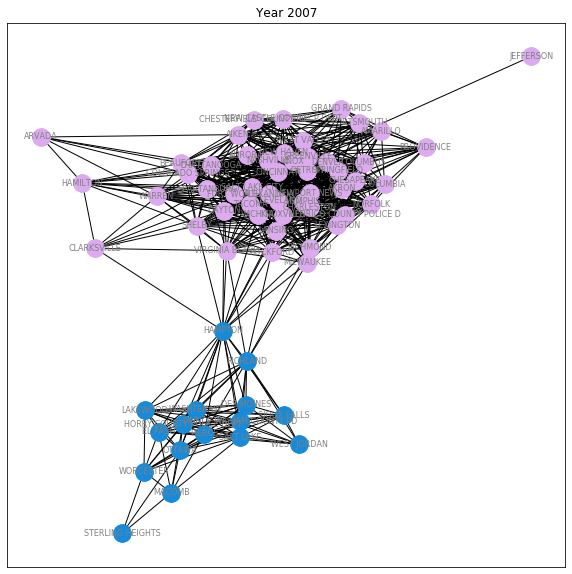

NetworkX graph for 2008


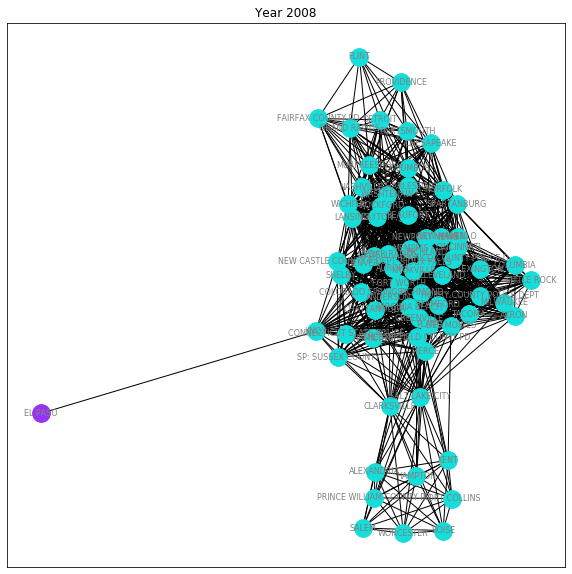

NetworkX graph for 2009


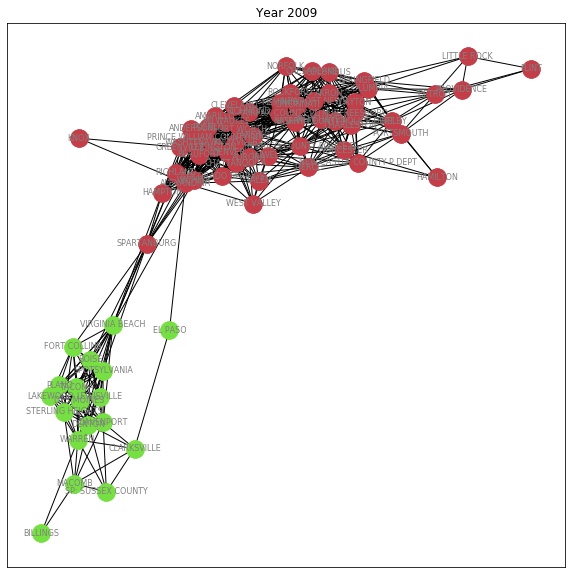

NetworkX graph for 2010


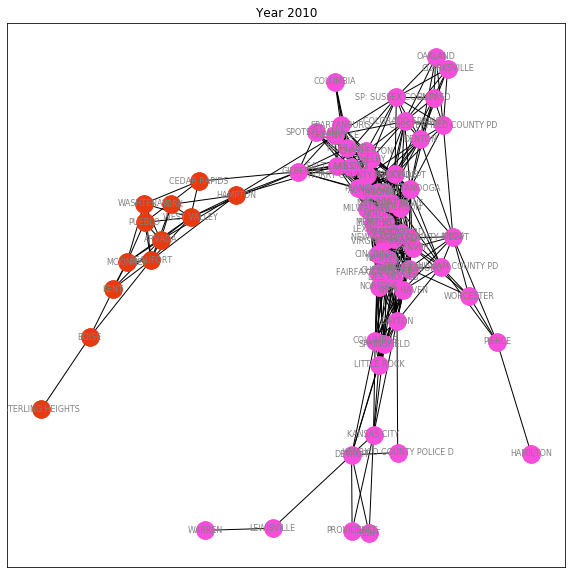

NetworkX graph for 2011


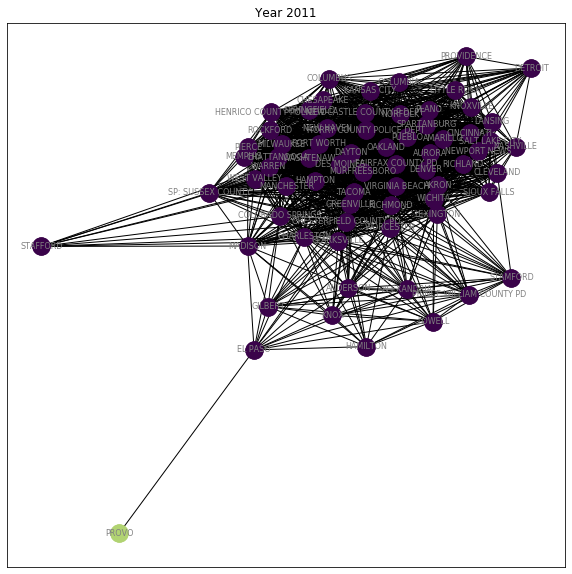

NetworkX graph for 2012


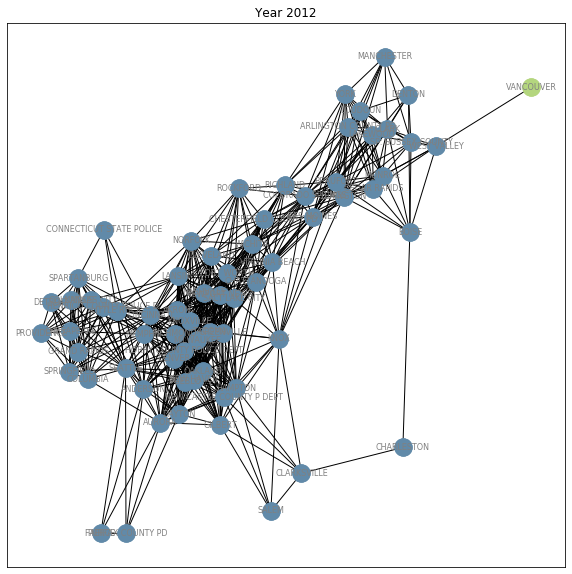

NetworkX graph for 2013


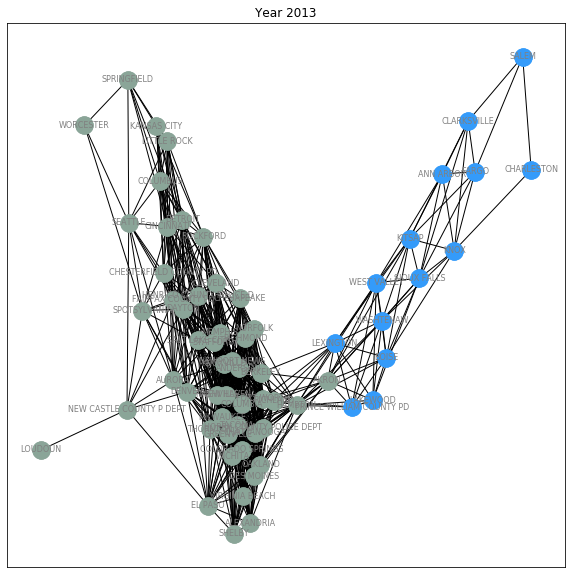

NetworkX graph for 2014


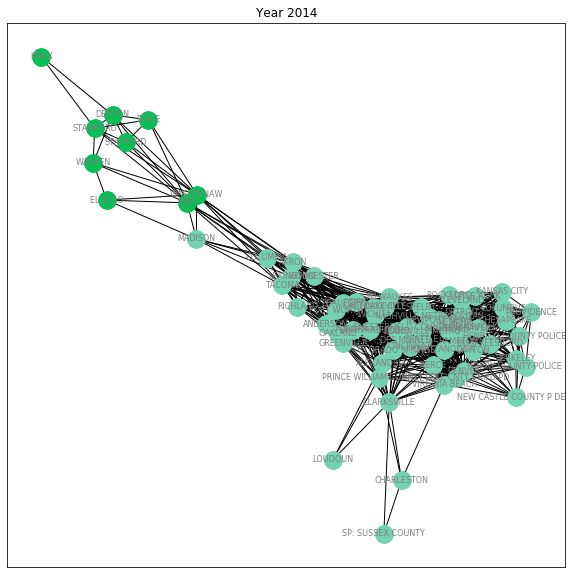

NetworkX graph for 2015


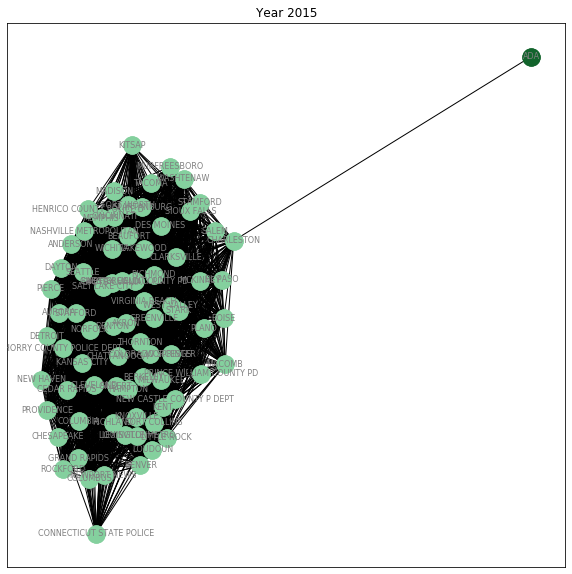

NetworkX graph for 2016


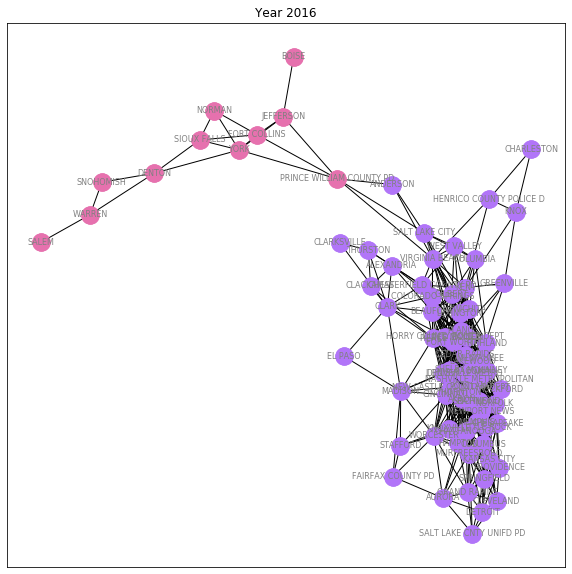

In [3]:
#Mahlika George - Capstone Project

#importing the required packages
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from Cleaning.networking import creating_networks
from Cleaning.networking import colors
from networkx.algorithms import community

filename = 'Data/2007-2016.xlsx'

#creating a list for all the years that will be ran
Years = ['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016']
top_comm = []
communities = []


#this loop will run and print for each year individually
for yr in Years:
    df = pd.read_excel(filename, sheet_name = eval('yr'))
    
    #calling the function that creates the networks
    results = creating_networks(df)
    
    #saving the results of the function to there specific variable for plotting
    G = results[0]
    labels = results[1]
    #color_map = results[2]
    #high_edge_list = results[3]
    #med_edge_list = results[4]
    #low_edge_list = results[5]
    communities_generator = community.girvan_newman(G)
    top_level_communities = next(communities_generator)
    next_level_communities = next(communities_generator)
    while True:
        if len(next_level_communities) <7:
            next_level_communities = next(communities_generator)
        else:
            break
    sorted(map(sorted, next_level_communities))
    
    top_comm.append(top_level_communities)
    communities.append(next_level_communities)
    
    color_mapped = colors(top_level_communities)


    
    #creating the network and its layout
    pos = nx.spring_layout(G)
    plt.figure(figsize=(10,10))
    plt.title('Year ' + yr)
    nx.draw_networkx(G,pos,node_size=5,with_labels=False)
    
    for i in range(len(top_level_communities)):
        nx.draw_networkx_nodes(G, pos, nodelist=top_level_communities[i], node_color=color_mapped[i])
        nx.draw_networkx_nodes(G, pos, nodelist=top_level_communities[i], node_color=color_mapped[i])

    #focusing on the specifications of the eges
    #nx.draw_networkx_edges(G,pos,node_size=5,node_color=color_map,font_color='w',edgelist=high_edge_list,edge_color='red')
    #nx.draw_networkx_edges(G,pos,node_size=5,node_color=color_map,font_color='w',edgelist=med_edge_list,edge_color='orange')
    #nx.draw_networkx_edges(G,pos,node_size=5,node_color=color_map,font_color='w',edgelist=low_edge_list,edge_color='lightgrey')
    nx.draw_networkx_labels(G,pos,labels,font_size=8,font_color='gray')
    plt.show()

In [11]:
nx.number_connected_components(G)

1

In [60]:
next_level_communities

({0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  14,
  15,
  16,
  17,
  18,
  19,
  21,
  23,
  24,
  25,
  26,
  27,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  39,
  41,
  42,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  53,
  57,
  58,
  61,
  64,
  65,
  67,
  68,
  69,
  71,
  73,
  74,
  75,
  77},
 {13, 20, 38, 43, 54, 60, 62, 66, 70, 72, 78},
 {22, 28, 76},
 {40, 59, 63},
 {52},
 {55},
 {56})